# 18.2.2 Visualizing statistical relationships with Seaborn plots -

Statistical analysis is a process of understanding how variables in a dataset related to each other and how those relationships depend on other variables. 

Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

Following Kind of plots can be helpful -
1. **Numerical Data Ploting**
- ```relplot()```
- ```scatterplot()```
- ```lineplot()```

2. **Categorical Data Ploting**
- ```catplot()```
- ```boxplot()```
- ```stripplot()```
- ```swarmplot()```
- etc...

3. **Visualizing Distribution of the Data**
- ```distplot()```
- ```kdeplot()```
- ```jointplot()```
- ```rugplot()```

4. **Linear Regression and Relationship**
- ```regplot()```
- ```lmplot()```

5. **Controlling Ploted Figure Aesthetics**
- figure styling
- axes styling
- color palettes
- etc..

In [53]:
# import seaborn and othe required libs
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# set style
sns.set(style = 'darkgrid')

In [55]:
# load tips dataset for analysis
tips = sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### 18.2.2.1 ```relplot()```
**Full signature of relplot**-
```python
seaborn.relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
```
Observe the dafault values given in the function signature.
We'll use the most important ones in the following examples. Rest can be left to the default value.

For detailed info refer docs here - [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html)

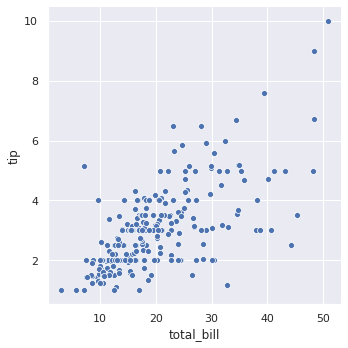

In [63]:
# lets see a relational plot of total_bill vs tip on tips dataset
sns.relplot(x = 'total_bill', y = 'tip', data = tips)

In [57]:
# dir(sns.FacetGrid)

In [58]:
# check the value counts for smoker column
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

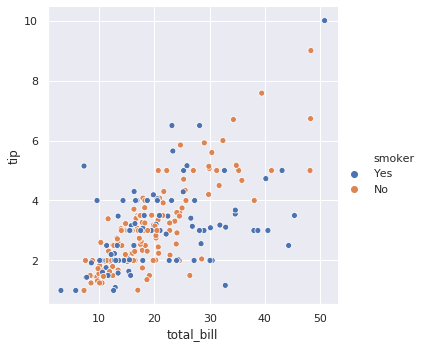

In [60]:
# you can just use hue for smoker vs non-smoker wise information
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker')

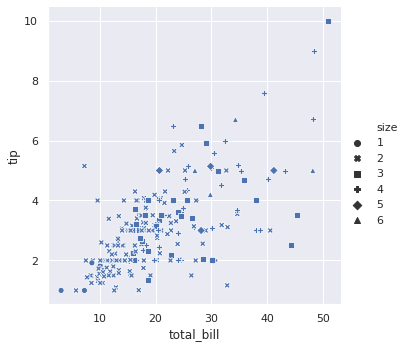

In [61]:
# you can just use style for "size" column wise information
sns.relplot(x = 'total_bill', y = 'tip', style = 'size', data = tips)

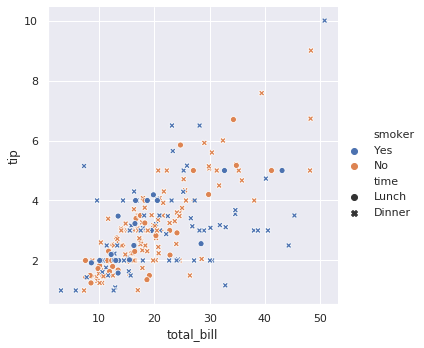

In [62]:
# use hue and style and both for additional information
# compare it with the previous graphs
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', style = 'time')

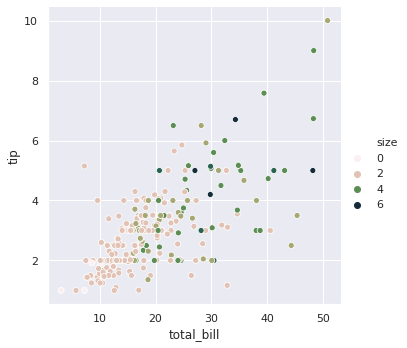

In [64]:
# specify pallete color range it maps with data range of "size" column 
# and plots the color accordingly
sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', data = tips, palette = 'ch:r=-0.8, l= 0.95')

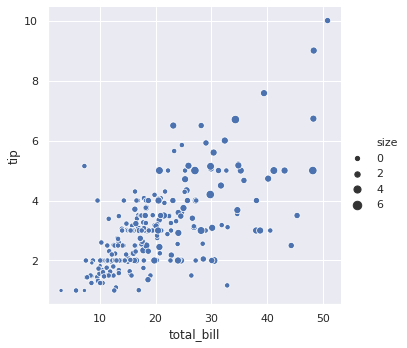

In [65]:
# here passing "size" column to the size argument for size wise plot
# daimeter of the circle represent the magnitude of the data point
# present in the "size" column
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size')

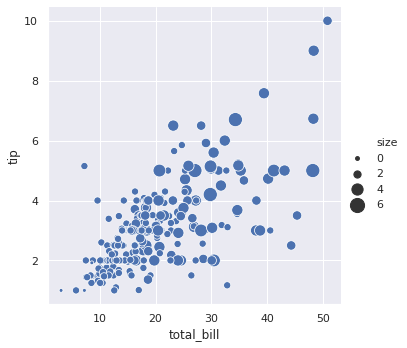

In [66]:
# we can also specify size range for size keyword in tuple format
# it maps with size column value
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size', sizes = (15, 200))

In [67]:
# from numpy.random import randn

In [68]:
# lets generate a dummpy data using numpy
data = dict(time = np.arange(500), 
            value = np.random.randn(500).cumsum())

df = pd.DataFrame(data)

In [69]:
df.head()

,time,value
0,0,0.149844
1,1,1.012495
2,2,1.249094
3,3,2.132469
4,4,2.693995


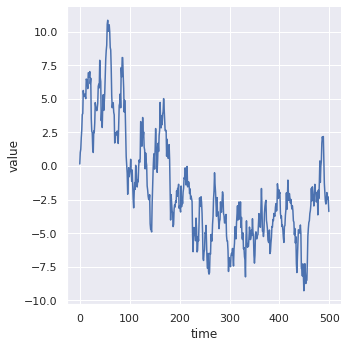

In [70]:
# plotting the data and this time changing kind to line.
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df, sort = True)

In [72]:

dummy_data = np.random.randn(500, 2).cumsum(axis=0)
df = pd.DataFrame(dummy_data, columns = ['time', 'value'])

In [73]:
df.head()

,time,value
0,0.062462,-0.336532
1,-0.394205,-0.594711
2,-1.610760,0.411687
3,-1.890561,-1.022370
4,-3.379730,0.193399


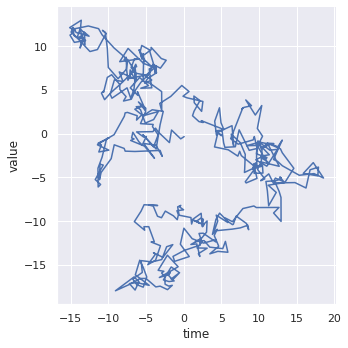

In [75]:
# whene sorting is false it plots a random ouput
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df, sort = False)

In [19]:
# lets load fmri data
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


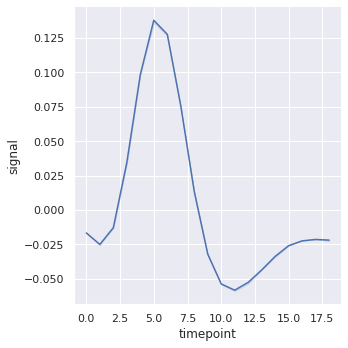

In [20]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri, ci = False)

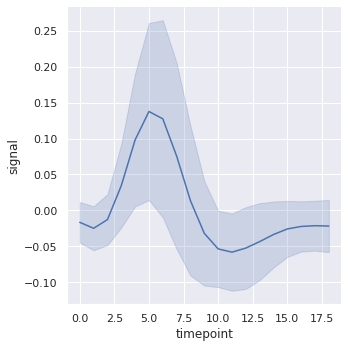

In [21]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri, ci = 'sd')

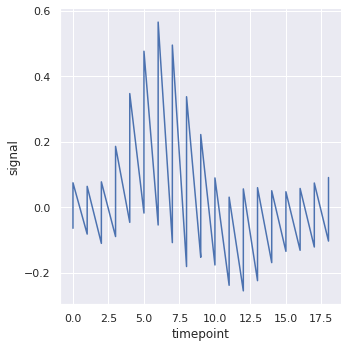

In [22]:
sns.relplot(x = 'timepoint', y = 'signal', estimator = None, kind = 'line', data = fmri)

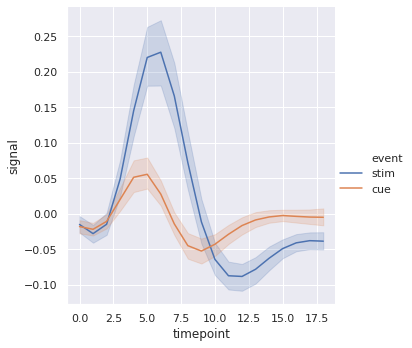

In [23]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', kind = 'line', data = fmri)

In [24]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


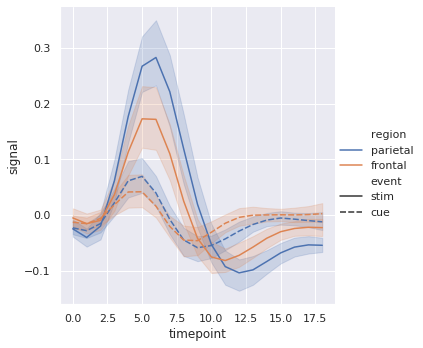

In [25]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event', kind = 'line', data = fmri)

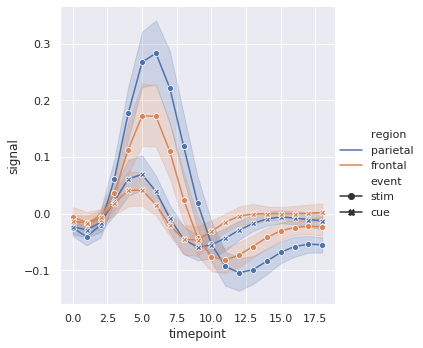

In [26]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event', kind = 'line', data = fmri, markers = True, dashes = False)

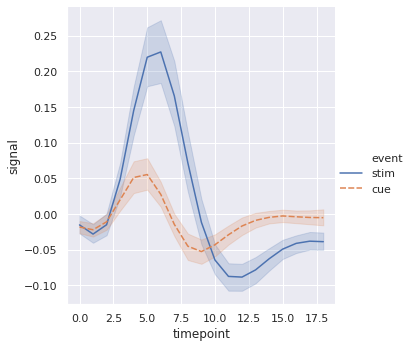

In [27]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', style = 'event', kind = 'line', data = fmri)

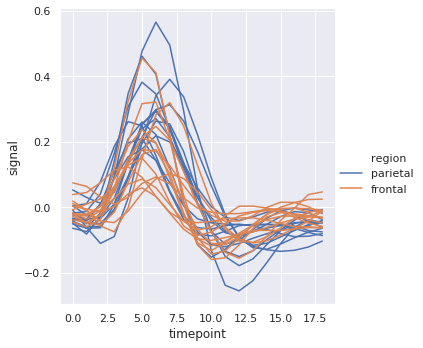

In [28]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', units = 'subject', estimator = None, kind = 'line', data = fmri.query("event == 'stim'"))

In [29]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [30]:
dots = sns.load_dataset('dots').query("align == 'dots'")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


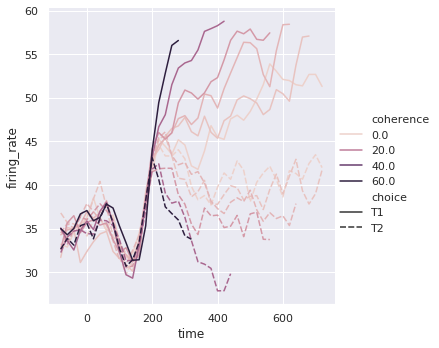

In [31]:
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', style = 'choice')

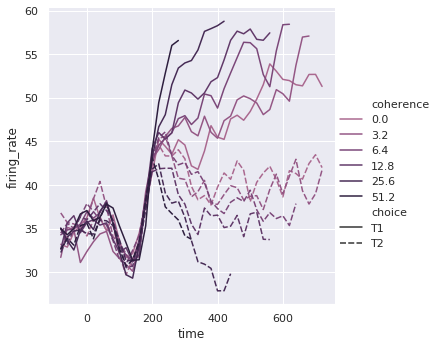

In [32]:
palette = sns.cubehelix_palette(light = 0.5, n_colors=6)
sns.relplot(x = 'time', y = 'firing_rate', data = dots, kind = 'line', hue = 'coherence', style = 'choice', palette=palette)

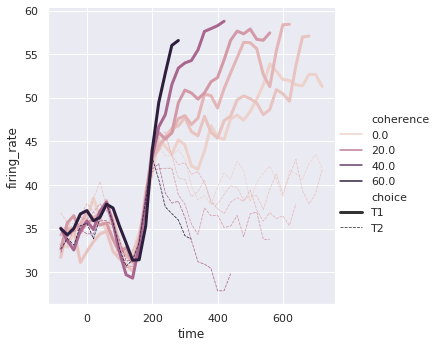

In [33]:
sns.relplot(x = 'time', y = 'firing_rate', hue = 'coherence', size = 'choice', style = 'choice', kind = 'line', data = dots)

In [34]:
df = pd.DataFrame(dict(time = pd.date_range('2019-06-02', periods = 500), value = randn(500).cumsum()))

In [35]:
df.head()

,time,value
0,2019-06-02,1.146468
1,2019-06-03,1.004228
2,2019-06-04,1.944299
3,2019-06-05,-0.019093
4,2019-06-06,-0.154712


/home/c17hawke_ai/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


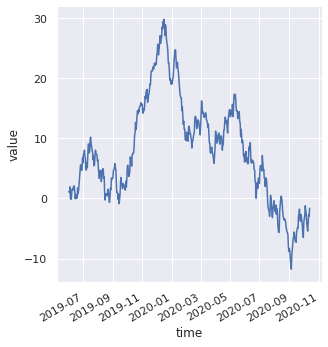

In [36]:
g = sns.relplot(x = 'time', y = 'value', kind = 'line', data = df)
g.fig.autofmt_xdate()

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


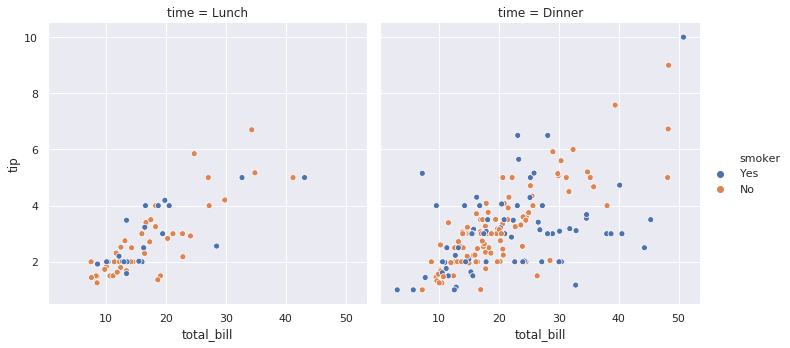

In [38]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', data = tips)

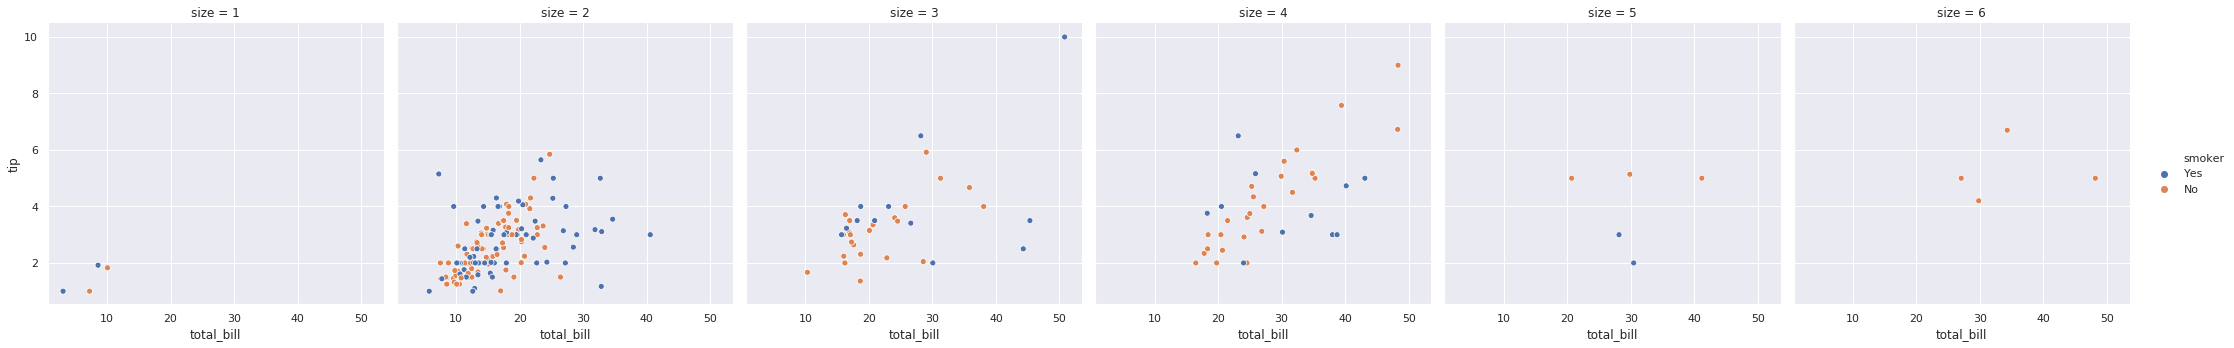

In [39]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size', data = tips)

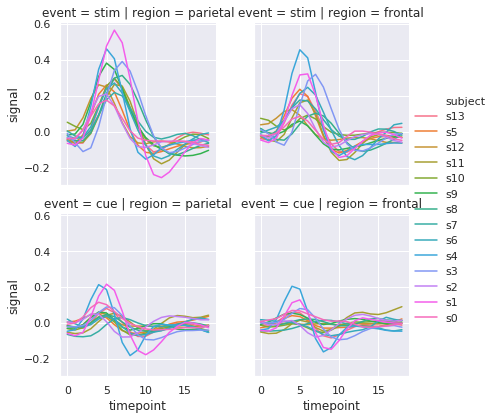

In [40]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'subject', col = 'region', row = 'event', height=3, kind = 'line', estimator = None, data = fmri)

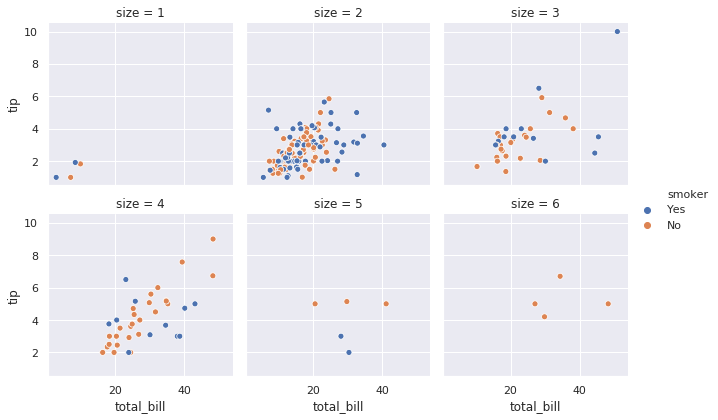

In [41]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size', data = tips, col_wrap=3, height=3)

### 18.2.2.2 ```scatterplot()```

**Full Signature of Scatterplot**

```python
seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)
```

Observe the dafault values given in the function signature. We'll use the most important ones in the following examples. Rest can be left to the default value.

For detailed info refer docs here - [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

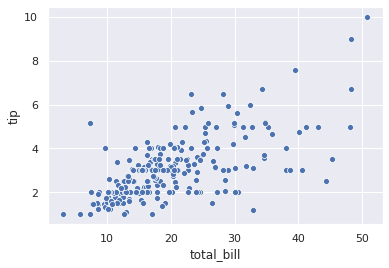

In [42]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

In [43]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


### 18.2.2.3 ```lineplot()```

**Full Signature of lineplot**

```python
seaborn.lineplot(x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)
```

Observe the dafault values given in the function signature. We'll use the most important ones in the following examples. Rest can be left to the default value.

For detailed info refer docs here - [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

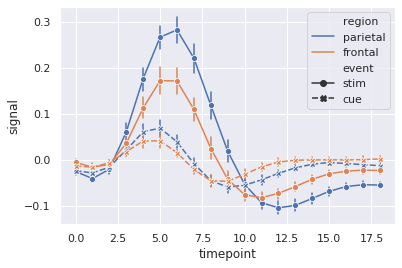

In [44]:
sns.lineplot(x = 'timepoint', y  = 'signal', style = 'event', hue = 'region', data = fmri, markers = True, ci = 68, err_style='bars')

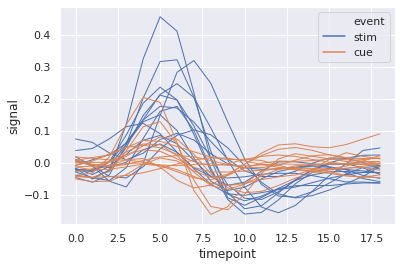

In [45]:
sns.lineplot(x = 'timepoint', y = 'signal', hue = 'event', units = 'subject', estimator = None, lw = 1, data = fmri.query("region == 'frontal'"))

In [46]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


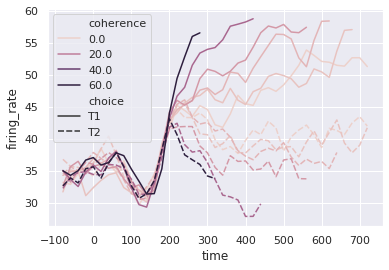

In [47]:
sns.lineplot(x = 'time', y = 'firing_rate', hue = 'coherence', style = 'choice', data = dots)

---

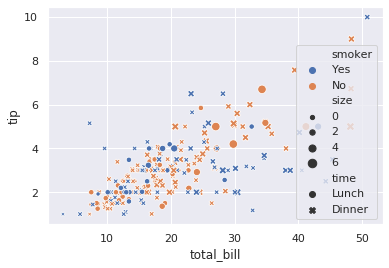

In [48]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', size = 'size', style = 'time')

In [49]:
iris = sns.load_dataset('iris')

In [50]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


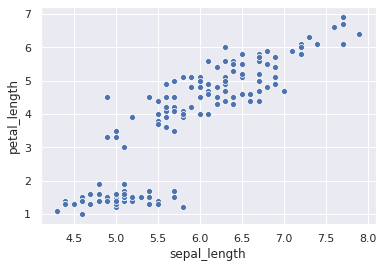

In [51]:
sns.scatterplot(x = 'sepal_length', y = 'petal_length', data = iris)

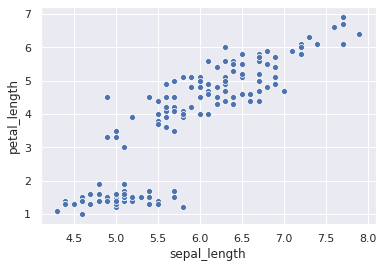

In [52]:
sns.scatterplot(x = iris['sepal_length'], y = iris['petal_length'])